In [2]:
import pandas as pd


In [28]:
df=pd.read_csv('C://Users/Ranjitha/iris.csv')
df.Species.value_counts()
df['Fcat']=df['Species'].map({'setosa':1,'versicolor':0,'virginica':0})
df.head()
df.isnull().sum()
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
Fcat              int64
dtype: object

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import scale,LabelEncoder

In [30]:
X=df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=df['Fcat']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_test=lr.predict(X_test)
Actual_variance =lr.score(X_train,y_train)
print("actual variance is {}".format(Actual_variance))
explained_variance =lr.score(X_test,y_test)
print("explained variance is {}".format(explained_variance))

actual variance is 1.0
explained variance is 1.0


In [35]:
print("coeff for logistic regression are {}".format(lr.coef_))

coeff for logistic regression are [[ 0.41722818  1.34748681 -2.15938179 -0.97760735]]


In [48]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,jaccard_similarity_score, roc_auc_score

ev=explained_variance_score(y_test,Y_test,multioutput='uniform_average')
print("explained varinace score is {}".format(ev))
mae = mean_absolute_error(y_test,Y_test,multioutput='uniform_average')
print("mean absolute error values are {}".format(mae))
mse = mean_squared_error(y_test,Y_test,multioutput='uniform_average')
print("mean squared error values are {}".format(mse))
sc = r2_score(y_test,Y_test)
print("r2 score values are {}". format(sc))
print('% of similarity in pedictions: {}'.format(jaccard_similarity_score(y_test, Y_test)))

explained varinace score is 1.0
mean absolute error values are 0.0
mean squared error values are 0.0
r2 score values are 1.0
% of similarity in pedictions: 1.0


In [43]:
#confusion matrix
print(metrics.confusion_matrix(y_test,Y_test))

[[19  0]
 [ 0 11]]


In [46]:
print(metrics.classification_report(y_test,Y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30



In [49]:
false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,Y_test)
roc_area=auc(false_positive_rate,true_positive_rate)
print("area under the curve is {}". format(roc_area))

area under the curve is 1.0


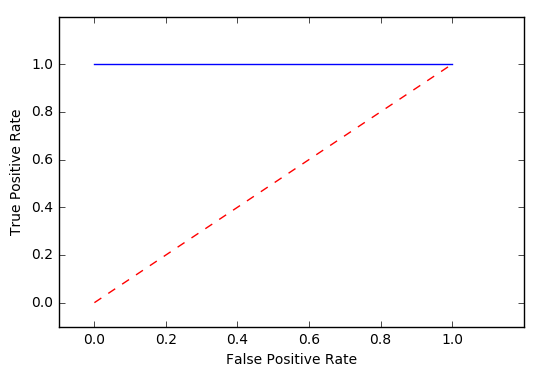

In [105]:
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC ' % roc_area)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
CVscore=cross_val_score(LogisticRegression(),X,y,cv=10)
print(CVscore)
print(CVscore.mean())



[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0


New IRIS df with species types virginica and versicolor

In [62]:
newdf=df[df.Species.isin (['virginica','versicolor'])]

In [72]:
newdf.columns
newdf.Species.value_counts()
newdf['Fcat']=newdf.Species.map({'virginica':0,'versicolor':1})

C:\Users\Ranjitha\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [73]:
newdf.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Fcat
50,7.0,3.2,4.7,1.4,versicolor,1
51,6.4,3.2,4.5,1.5,versicolor,1
52,6.9,3.1,4.9,1.5,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1


In [82]:
Xn=newdf[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
yn=newdf['Fcat']
Xn_train,Xn_test,yn_train,yn_test=train_test_split(Xn,yn,test_size=0.3,random_state=0)


In [84]:
nlr = LogisticRegression()
nlr.fit(Xn_train,yn_train)
Yn_test=nlr.predict(Xn_test)
explained_variance = nlr.score(Xn_test,yn_test)
print("explained variance for new data frame is {}".format(explained_variance))

explained variance for new data frame is 0.9333333333333333


In [86]:
print("coef for new df is {}".format(nlr.coef_))

coef for new df is [[ 1.51766687  1.42623154 -2.31553068 -2.06738366]]


In [87]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,jaccard_similarity_score, roc_auc_score

ev=explained_variance_score(yn_test,Yn_test,multioutput=
                           'uniform_average')
print("explained varinace score is {}".format(ev))
mae = mean_absolute_error(yn_test,Yn_test,multioutput='uniform_average')
print("mean absolute error values are {}".format(mae))
mse = mean_squared_error(yn_test,Yn_test,multioutput='uniform_average')
print("mean squared error values are {}".format(mse))
sc = r2_score(yn_test,Yn_test)
print("r2 score values are {}". format(sc))
print('% of similarity in pedictions: {}'.format(jaccard_similarity_score(yn_test, Yn_test)))

explained varinace score is 0.7511111111111111
mean absolute error values are 0.06666666666666667
mean squared error values are 0.06666666666666667
r2 score values are 0.7333333333333334
% of similarity in pedictions: 0.9333333333333333


In [88]:
# confusion matrix for new df
print(metrics.confusion_matrix(yn_test,Yn_test))

[[15  0]
 [ 2 13]]


In [89]:
#classification reports
print(metrics.classification_report(yn_test,Yn_test))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94        15
          1       1.00      0.87      0.93        15

avg / total       0.94      0.93      0.93        30



In [91]:
falsePositive,truePositive,threshold=roc_curve(yn_test,Yn_test)
area=auc(falsePositive,truePositive)
print("area under curve is {}".format(area))

area under curve is 0.9333333333333333


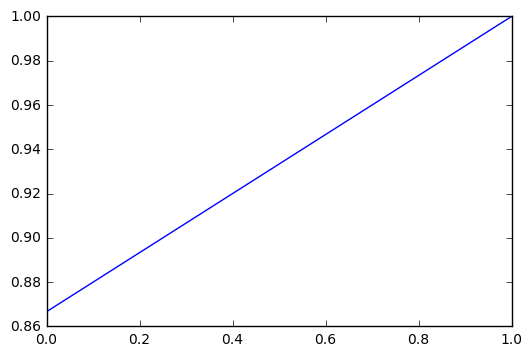

In [94]:
plt.plot(falsePositive, truePositive, 'b',
label='AUC ' % area)


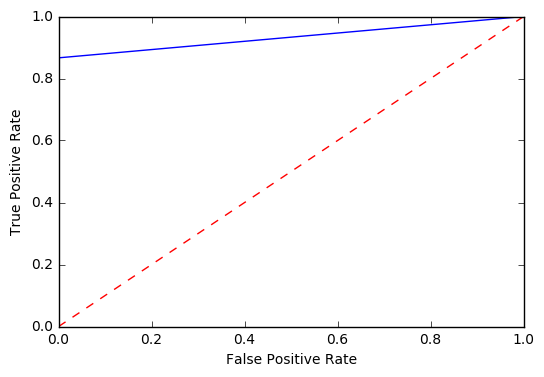

In [96]:
plt.plot(falsePositive, truePositive, 'b',
label='AUC ' % area)
plt.plot([0,1],[0,1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
cvscore=cross_val_score(LogisticRegression(),Xn,yn,cv=5)
print(cvscore)
print(cvscore.mean())
print(cvscore.max())

[ 1.    1.    0.9   0.95  1.  ]
0.97
1.0
